## Sensitivity Analysis using Python
---------------------------------------

### Required modules

In [1]:
import numpy as np
import pandas as pd
from itertools import product as producto
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Parameters iteration range

In [2]:
rfrange = np.arange(0.01,0.06,0.0005)
betarange= np.arange(.6,1.2,0.006)
mktpremiumrange= np.arange(.07,.13,0.0006)

In [3]:
len(rfrange) == len(betarange) == len(mktpremiumrange)

True

In [4]:
cost_of_equity = []
risk_free_rate = []
betas = []
Market_Risk_Premium = []

## Iteration

In [5]:
for rf,beta,mktpre in producto(rfrange, betarange, mktpremiumrange):
    cost = rf + beta*mktpre
    cost_of_equity.append(cost)
    risk_free_rate.append(rf)
    betas.append(beta)
    Market_Risk_Premium.append(mktpre)

## Charts generation

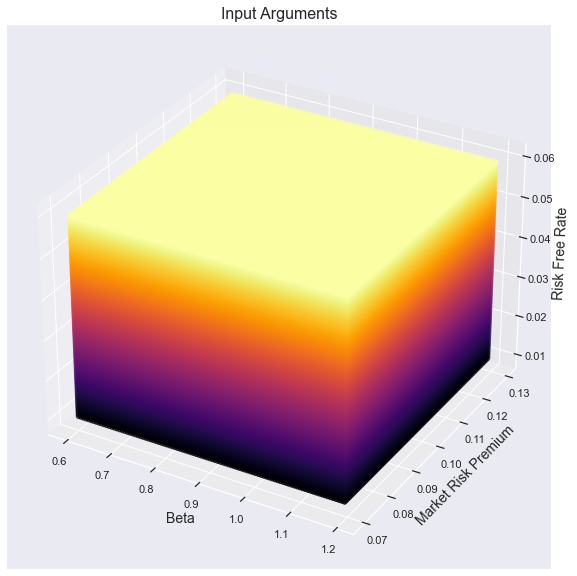

In [6]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.scatter3D(betas, Market_Risk_Premium, risk_free_rate, c= risk_free_rate ,cmap='inferno')
ax.set_title('Input Arguments',fontsize = 16)
ax.set_xlabel('Beta',fontsize = 14)
ax.set_ylabel('Market Risk Premium',fontsize = 14)
ax.set_zlabel('Risk Free Rate',fontsize = 14);

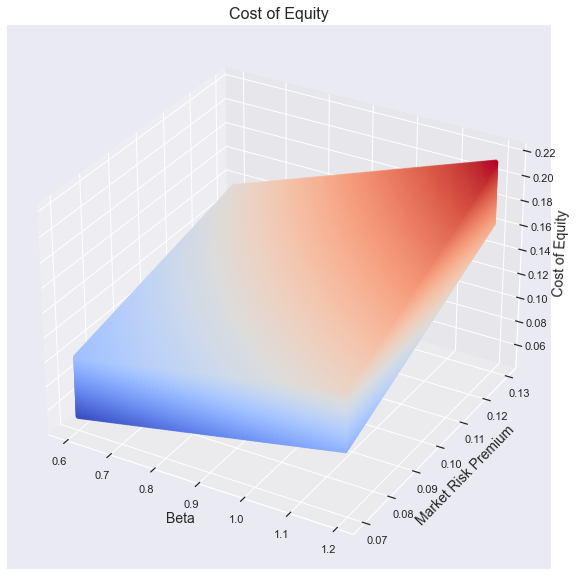

In [7]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.scatter3D(betas, Market_Risk_Premium, cost_of_equity, c= cost_of_equity ,cmap='coolwarm')
ax.set_title('Cost of Equity',fontsize = 16)
ax.set_xlabel('Beta',fontsize = 14)
ax.set_ylabel('Market Risk Premium',fontsize = 14)
ax.set_zlabel('Cost of Equity',fontsize = 14);

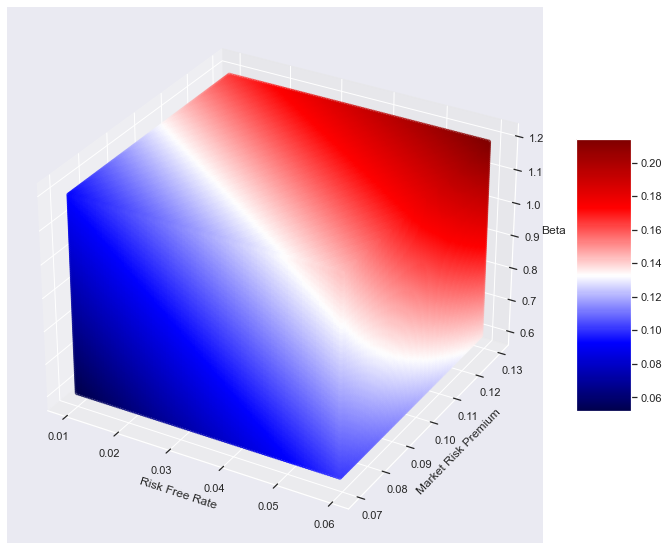

In [8]:
fig = plt.figure(figsize=(12, 10))
ax = fig.gca(projection='3d')

surf = ax.scatter(risk_free_rate, Market_Risk_Premium, betas, c=cost_of_equity, cmap='seismic')
ax.set_xlabel('Risk Free Rate')
ax.set_ylabel('Market Risk Premium')
ax.set_zlabel('Beta')

fig.colorbar(surf, shrink=0.5, aspect=5);

In [9]:
bet,  market = np.meshgrid(betarange,mktpremiumrange)

In [10]:
costo = bet*market

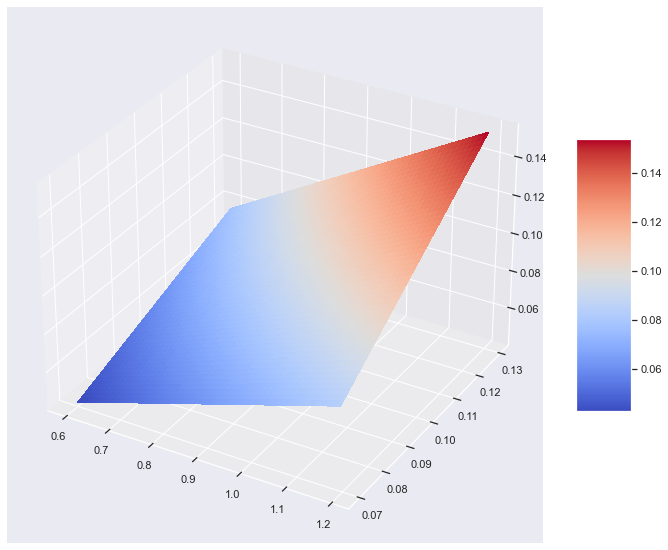

In [11]:
fig = plt.figure(figsize=(12, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(bet,market, costo, cmap='coolwarm',linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [12]:
results = pd.DataFrame()

In [13]:
results['Risk_Free_Rate']= risk_free_rate
results['Beta']= betas
results['Market_Risk_Premium']= Market_Risk_Premium
results['Cost_of_Equity']= cost_of_equity

In [14]:
results

Risk_Free_Rate   Beta  Market_Risk_Premium  Cost_of_Equity
0               0.0100  0.600               0.0700        0.052000
1               0.0100  0.600               0.0706        0.052360
2               0.0100  0.600               0.0712        0.052720
3               0.0100  0.600               0.0718        0.053080
4               0.0100  0.600               0.0724        0.053440
...                ...    ...                  ...             ...
999995          0.0595  1.194               0.1270        0.211138
999996          0.0595  1.194               0.1276        0.211854
999997          0.0595  1.194               0.1282        0.212571
999998          0.0595  1.194               0.1288        0.213287
999999          0.0595  1.194               0.1294        0.214004

[1000000 rows x 4 columns]

### How to find specific values in a Dataframe
---------------------------

In [15]:
results[(results['Risk_Free_Rate']==0.01) & (results['Beta'] == 0.6) & (results['Market_Risk_Premium']==0.07)]

Risk_Free_Rate  Beta  Market_Risk_Premium  Cost_of_Equity
0            0.01   0.6                 0.07           0.052

In [16]:
results

Risk_Free_Rate   Beta  Market_Risk_Premium  Cost_of_Equity
0               0.0100  0.600               0.0700        0.052000
1               0.0100  0.600               0.0706        0.052360
2               0.0100  0.600               0.0712        0.052720
3               0.0100  0.600               0.0718        0.053080
4               0.0100  0.600               0.0724        0.053440
...                ...    ...                  ...             ...
999995          0.0595  1.194               0.1270        0.211138
999996          0.0595  1.194               0.1276        0.211854
999997          0.0595  1.194               0.1282        0.212571
999998          0.0595  1.194               0.1288        0.213287
999999          0.0595  1.194               0.1294        0.214004

[1000000 rows x 4 columns]

### How to run iterations over an existing Dataframe
---------------------

1. Iloc 

In [17]:
for i in range(len(results)):
    row = results.iloc[i]

In [18]:
for i in range(5):
    row = results.iloc[i]
    print(row)

Risk_Free_Rate         0.010
Beta                   0.600
Market_Risk_Premium    0.070
Cost_of_Equity         0.052
Name: 0, dtype: float64
Risk_Free_Rate         0.01000
Beta                   0.60000
Market_Risk_Premium    0.07060
Cost_of_Equity         0.05236
Name: 1, dtype: float64
Risk_Free_Rate         0.01000
Beta                   0.60000
Market_Risk_Premium    0.07120
Cost_of_Equity         0.05272
Name: 2, dtype: float64
Risk_Free_Rate         0.01000
Beta                   0.60000
Market_Risk_Premium    0.07180
Cost_of_Equity         0.05308
Name: 3, dtype: float64
Risk_Free_Rate         0.01000
Beta                   0.60000
Market_Risk_Premium    0.07240
Cost_of_Equity         0.05344
Name: 4, dtype: float64


2. iterrows():

In [19]:
for i, row in results.iterrows():
    index = i
    beta = row['Beta']
    cost_of_Equity = ['Cost_of_Equity']

In [20]:
for i, row in results.head(5).iterrows():
    print(i)
    print(row)

0
Risk_Free_Rate         0.010
Beta                   0.600
Market_Risk_Premium    0.070
Cost_of_Equity         0.052
Name: 0, dtype: float64
1
Risk_Free_Rate         0.01000
Beta                   0.60000
Market_Risk_Premium    0.07060
Cost_of_Equity         0.05236
Name: 1, dtype: float64
2
Risk_Free_Rate         0.01000
Beta                   0.60000
Market_Risk_Premium    0.07120
Cost_of_Equity         0.05272
Name: 2, dtype: float64
3
Risk_Free_Rate         0.01000
Beta                   0.60000
Market_Risk_Premium    0.07180
Cost_of_Equity         0.05308
Name: 3, dtype: float64
4
Risk_Free_Rate         0.01000
Beta                   0.60000
Market_Risk_Premium    0.07240
Cost_of_Equity         0.05344
Name: 4, dtype: float64


3. itertuples():

In [22]:
for row_results in results.head(5).itertuples():
    print(row_results)

Pandas(Index=0, Risk_Free_Rate=0.01, Beta=0.6, Market_Risk_Premium=0.07, Cost_of_Equity=0.052000000000000005)
Pandas(Index=1, Risk_Free_Rate=0.01, Beta=0.6, Market_Risk_Premium=0.07060000000000001, Cost_of_Equity=0.052360000000000004)
Pandas(Index=2, Risk_Free_Rate=0.01, Beta=0.6, Market_Risk_Premium=0.07120000000000001, Cost_of_Equity=0.05272000000000001)
Pandas(Index=3, Risk_Free_Rate=0.01, Beta=0.6, Market_Risk_Premium=0.07180000000000002, Cost_of_Equity=0.05308000000000001)
Pandas(Index=4, Risk_Free_Rate=0.01, Beta=0.6, Market_Risk_Premium=0.07240000000000002, Cost_of_Equity=0.053440000000000015)


In [23]:
for row_results in results[5:10].itertuples():
    print(row_results.Beta)

0.6
0.6
0.6
0.6
0.6
